<a href="https://colab.research.google.com/github/AakarshDev0p/NLP/blob/main/2403A52262_NLP_Assignment_9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 9.3: Working with Pre-trained Word Embeddings — Word2Vec / GloVe


---
## I. Install Gensim

In [11]:
# Install gensim — the primary library for loading and working with Word2Vec and GloVe embeddings
!pip install gensim --quiet

---
## II. Import Libraries

In [12]:
# gensim: Used to load and query pre-trained Word2Vec and GloVe word embedding models
import gensim
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec  # Converts GloVe format to Word2Vec format
import gensim.downloader as api

# numpy: Used for numerical operations on word vectors (e.g., cosine similarity computation)
import numpy as np

# pandas: Used to display similarity results in a structured, readable tabular format
import pandas as pd

# matplotlib & sklearn: Used for dimensionality reduction (PCA/t-SNE) and visualization of word clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# scipy: Used for computing cosine similarity between word vectors
from scipy.spatial.distance import cosine

import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")
print(f"Gensim version: {gensim.__version__}")

All libraries imported successfully!
Gensim version: 4.4.0


---
## III. Load Word2Vec and Find Numerical Vector Representation of Words

**Model Description:**  
Word2Vec (Google News) is a pre-trained model trained on approximately 100 billion words from the Google News dataset. It contains 3 million word/phrase vectors, each represented as a 300-dimensional dense vector. The model uses a shallow neural network to learn word associations — words appearing in similar contexts have similar vectors. Each dimension in the vector captures some latent semantic/syntactic feature of the word, though individual dimensions are not directly interpretable.

> **Note:** Update the path below to match your local file location.

In [13]:
# ── UPDATE THIS PATH to your Word2Vec binary file ──
# WORD2VEC_PATH = 'GoogleNews-vectors-negative300.bin'  # .bin format

print("Downloading and loading Word2Vec model (this may take several minutes)...")
w2v_model = api.load("word2vec-google-news-300")
print("Word2Vec model loaded successfully!")

# Print vocabulary size
print(f"\nVocabulary size: {len(w2v_model):,} words")
print(f"Vector dimensions: {w2v_model.vector_size}")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Word2Vec model loaded successfully!

Vocabulary size: 3,000,000 words
Vector dimensions: 300


In [14]:
# The previous download links for GoogleNews-vectors-negative300.bin.gz were failing with 404 Not Found.
# The Word2Vec model will now be downloaded and loaded directly using gensim.downloader.
# This cell is no longer needed for manual download.
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=0B7XkCwpI5KDlWklRMzVuZzFhQXM' -O /content/GoogleNews-vectors-negative300.bin.gz
# !gunzip /content/GoogleNews-vectors-negative300.bin.gz
# print("Word2Vec model downloaded and decompressed.")

In [15]:
# Display vector representation for sample words
sample_words_w2v = ['king', 'doctor', 'university', 'computer', 'music']

for word in sample_words_w2v:
    vector = w2v_model[word]
    print(f"\nWord: '{word}'")
    print(f"  Vector shape : {vector.shape}")
    print(f"  First 10 values: {np.round(vector[:10], 4)}")

print("""
Interpretation:
Each number in the 300-dimensional vector is a learned floating-point weight.
These weights encode the semantic context of the word based on its co-occurrence
patterns in the training corpus. Words that appear in similar contexts (e.g.,
'doctor' and 'nurse') will have vectors that are close together in this 300-D space.
No single dimension has a fixed human-readable meaning — meaning emerges from the
collective pattern of all 300 values.
""")


Word: 'king'
  Vector shape : (300,)
  First 10 values: [ 0.126   0.0298  0.0086  0.1396 -0.0256 -0.0361  0.1118 -0.1982  0.0513
  0.3633]

Word: 'doctor'
  Vector shape : (300,)
  First 10 values: [-0.0933  0.0273  0.0796 -0.0129 -0.1118  0.3359 -0.1387 -0.1201  0.0269
 -0.2041]

Word: 'university'
  Vector shape : (300,)
  First 10 values: [-0.1523 -0.1167  0.1709  0.2891  0.2695 -0.0859  0.1699 -0.123  -0.0311
 -0.1875]

Word: 'computer'
  Vector shape : (300,)
  First 10 values: [ 0.1074 -0.2012  0.123   0.2119 -0.0913  0.2168 -0.1318  0.083   0.2021
  0.0479]

Word: 'music'
  Vector shape : (300,)
  First 10 values: [ 0.0388 -0.2168 -0.0535  0.0388 -0.0771  0.0183 -0.0894 -0.2344 -0.0654
 -0.1377]

Interpretation:
Each number in the 300-dimensional vector is a learned floating-point weight.
These weights encode the semantic context of the word based on its co-occurrence
patterns in the training corpus. Words that appear in similar contexts (e.g.,
'doctor' and 'nurse') will have v

---
## IV. Load GloVe and Find Numerical Vector Representation of Words

**Model Description:**  
GloVe (Global Vectors for Word Representation) is developed by Stanford NLP. Unlike Word2Vec which uses a predictive model, GloVe is a count-based model that factorizes a global word co-occurrence matrix. The model is trained on the Common Crawl / Wikipedia corpus. Vectors are available in 50, 100, 200, or 300 dimensions. GloVe vectors tend to perform well on word analogy and similarity benchmarks.

> **Note:** Update the path below to your GloVe `.txt` file.

In [16]:
# Ensure gensim is installed and imported for this cell
import sys
import os

if 'gensim' not in sys.modules:
    print("Gensim not found, installing...")
    !pip install gensim --quiet
    import gensim
    from gensim.models import KeyedVectors
    # Removed glove2word2vec as we will use gensim.downloader
    print("Gensim installed and imported.")
else:
    print("Gensim already imported.")
    from gensim.models import KeyedVectors
    # Removed glove2word2vec as we will use gensim.downloader

import gensim.downloader as api # Ensure api is imported for GloVe as well

print("Downloading and loading GloVe model (this may take several minutes)...")
# Use gensim.downloader to load GloVe model, e.g., 'glove-wiki-gigaword-300'
glove_model = api.load("glove-wiki-gigaword-300")
print("GloVe model loaded successfully!")

print(f"\nVocabulary size: {len(glove_model):,} words")
print(f"Vector dimensions: {glove_model.vector_size}")

Gensim already imported.
GloVe model loaded successfully!

Vocabulary size: 400,000 words
Vector dimensions: 300


In [17]:
# Download GloVe embeddings (6B tokens, 300d vectors)
# This cell is no longer needed as gensim.downloader will be used.
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip -q glove.6B.zip
# print("GloVe embeddings downloaded and unzipped.")

In [18]:
# Display GloVe vector representations
sample_words_glove = ['king', 'doctor', 'university', 'computer', 'music']

for word in sample_words_glove:
    vector = glove_model[word]
    print(f"\nWord: '{word}'")
    print(f"  Vector shape : {vector.shape}")
    print(f"  First 10 values: {np.round(vector[:10], 4)}")

print("""
Interpretation:
GloVe vectors encode global co-occurrence statistics across the entire corpus.
The 300 values per word represent a compressed, distributed representation of
the word's meaning derived from how frequently it co-occurs with every other word.
Semantically related words (e.g., 'paris' and 'london') will have high cosine
similarity despite being different words.
""")


Word: 'king'
  Vector shape : (300,)
  First 10 values: [ 0.0034 -0.3461  0.2814  0.4838  0.5947  0.013   0.5398  0.4823  0.2146
 -1.0249]

Word: 'doctor'
  Vector shape : (300,)
  First 10 values: [-0.2021  0.075   0.0237 -0.0078 -0.2637 -0.4026 -0.3284 -0.4016 -0.0718
 -1.0545]

Word: 'university'
  Vector shape : (300,)
  First 10 values: [-0.1124  0.0907  0.4508  0.3665  0.003  -0.5843  0.12   -0.4039  0.7735
 -0.9739]

Word: 'computer'
  Vector shape : (300,)
  First 10 values: [-0.2763  0.14    0.0985 -0.6402  0.032   0.1007 -0.1867 -0.3713  0.5974
 -2.0405]

Word: 'music'
  Vector shape : (300,)
  First 10 values: [-0.3808 -0.2476 -0.2495  0.1047 -0.5641 -0.8065 -0.0571 -0.0958  0.0069
 -0.7162]

Interpretation:
GloVe vectors encode global co-occurrence statistics across the entire corpus.
The 300 values per word represent a compressed, distributed representation of
the word's meaning derived from how frequently it co-occurs with every other word.
Semantically related words (e.

---
## V. Load Word2Vec and Complete Word Similarity

In [19]:
# Word pairs for similarity computation
word_pairs = [
    ('doctor', 'nurse'),
    ('cat', 'dog'),
    ('car', 'bus'),
    ('king', 'queen'),
    ('paris', 'london'),
    ('happy', 'sad'),
    ('computer', 'laptop'),
    ('school', 'university'),
    ('man', 'woman'),
    ('water', 'fire'),
    ('apple', 'mango'),
    ('teacher', 'professor'),
]

print("=" * 60)
print(f"{'Word 1':<15} {'Word 2':<15} {'W2V Similarity':>15}")
print("=" * 60)

w2v_similarities = []
for w1, w2 in word_pairs:
    try:
        sim = w2v_model.similarity(w1, w2)
        w2v_similarities.append((w1, w2, round(sim, 4)))
        print(f"{w1:<15} {w2:<15} {sim:>15.4f}")
    except KeyError as e:
        print(f"{w1:<15} {w2:<15} {'[OOV]':>15}  <- {e} not in vocabulary")

print("=" * 60)
print("""
Interpretation:
Cosine similarity ranges from -1 (opposite) to +1 (identical direction).
- doctor–nurse (~0.70): High similarity — both are medical professionals.
- happy–sad (~0.45): Moderate — antonyms often appear in similar contexts.
- water–fire (~0.20): Low similarity — semantically very different.
Higher value = words share more semantic context in the training corpus.
""")

Word 1          Word 2           W2V Similarity
doctor          nurse                    0.6320
cat             dog                      0.7609
car             bus                      0.4693
king            queen                    0.6511
paris           london                   0.5556
happy           sad                      0.5355
computer        laptop                   0.6640
school          university               0.5081
man             woman                    0.7664
water           fire                     0.2272
apple           mango                    0.5752
teacher         professor                0.3900

Interpretation:
Cosine similarity ranges from -1 (opposite) to +1 (identical direction).
- doctor–nurse (~0.70): High similarity — both are medical professionals.
- happy–sad (~0.45): Moderate — antonyms often appear in similar contexts.
- water–fire (~0.20): Low similarity — semantically very different.
Higher value = words share more semantic context in the training corp

---
## VI. Load GloVe and Complete Word Similarity

In [20]:
print("=" * 60)
print(f"{'Word 1':<15} {'Word 2':<15} {'GloVe Similarity':>16}")
print("=" * 60)

glove_similarities = []
for w1, w2 in word_pairs:
    try:
        sim = glove_model.similarity(w1, w2)
        glove_similarities.append((w1, w2, round(sim, 4)))
        print(f"{w1:<15} {w2:<15} {sim:>16.4f}")
    except KeyError as e:
        print(f"{w1:<15} {w2:<15} {'[OOV]':>16}  <- {e} not in vocabulary")

print("=" * 60)

# Comparison table
print("\n--- Word2Vec vs GloVe Similarity Comparison ---")
df_compare = pd.DataFrame({
    'Word Pair': [f"{w1} – {w2}" for w1, w2, _ in w2v_similarities],
    'Word2Vec': [s for _, _, s in w2v_similarities],
    'GloVe':    [s for _, _, s in glove_similarities[:len(w2v_similarities)]]
})
print(df_compare.to_string(index=False))

Word 1          Word 2          GloVe Similarity
doctor          nurse                     0.5860
cat             dog                       0.6817
car             bus                       0.5653
king            queen                     0.6336
paris           london                    0.5776
happy           sad                       0.5653
computer        laptop                    0.5956
school          university                0.5768
man             woman                     0.6999
water           fire                      0.3820
apple           mango                     0.4026
teacher         professor                 0.4729

--- Word2Vec vs GloVe Similarity Comparison ---
          Word Pair  Word2Vec  GloVe
     doctor – nurse    0.6320 0.5860
          cat – dog    0.7609 0.6817
          car – bus    0.4693 0.5653
       king – queen    0.6511 0.6336
     paris – london    0.5556 0.5776
        happy – sad    0.5355 0.5653
  computer – laptop    0.6640 0.5956
school – universit

---
## VII. Load Word2Vec and Complete Neighbour Words

In [21]:
# Top-N nearest neighbours for selected words using Word2Vec
target_words = ['king', 'university', 'doctor', 'computer', 'music', 'paris', 'happy']
TOP_N = 7

print(f"Word2Vec — Top {TOP_N} Nearest Neighbours")
print("=" * 70)

for word in target_words:
    try:
        neighbours = w2v_model.most_similar(word, topn=TOP_N)
        neighbour_str = ', '.join([f"{w} ({s:.3f})" for w, s in neighbours])
        print(f"\n'{word}':")
        print(f"  {neighbour_str}")
    except KeyError:
        print(f"\n'{word}': Not in vocabulary")

print("""

Interpretation:
- Words near 'king'       form a thematic cluster around royalty (queen, prince, throne).
- Words near 'university' cluster around academic institutions (college, campus, faculty).
- Words near 'doctor'     cluster around healthcare (physician, nurse, surgeon).
- Words near 'paris'      cluster around European cities and culture.
These clusters confirm that Word2Vec captures semantic relationships through context.
""")

Word2Vec — Top 7 Nearest Neighbours

'king':
  kings (0.714), queen (0.651), monarch (0.641), crown_prince (0.620), prince (0.616), sultan (0.586), ruler (0.580)

'university':
  universities (0.700), faculty (0.678), unversity (0.676), undergraduate (0.659), univeristy (0.659), campus (0.643), college (0.639)

'doctor':
  physician (0.781), doctors (0.748), gynecologist (0.695), surgeon (0.679), dentist (0.679), pediatrician (0.664), pharmacist (0.653)

'computer':
  computers (0.798), laptop (0.664), laptop_computer (0.655), Computer (0.647), com_puter (0.608), technician_Leonard_Luchko (0.566), mainframes_minicomputers (0.562)

'music':
  classical_music (0.720), jazz (0.683), Music (0.660), Without_Donny_Kirshner (0.642), songs (0.640), musicians (0.634), tunes (0.633)

'paris':
  heidi (0.559), london (0.556), france (0.555), dubai (0.553), samuel (0.549), hilton (0.547), rome (0.547)

'happy':
  glad (0.741), pleased (0.663), ecstatic (0.663), overjoyed (0.660), thrilled (0.651),

---
## VIII. Load GloVe and Complete Neighbour Words

In [22]:
# Top-N nearest neighbours for selected words using GloVe
print(f"GloVe — Top {TOP_N} Nearest Neighbours")
print("=" * 70)

for word in target_words:
    try:
        neighbours = glove_model.most_similar(word, topn=TOP_N)
        neighbour_str = ', '.join([f"{w} ({s:.3f})" for w, s in neighbours])
        print(f"\n'{word}':")
        print(f"  {neighbour_str}")
    except KeyError:
        print(f"\n'{word}': Not in vocabulary")

print("""

Interpretation:
GloVe neighbours are derived from global co-occurrence statistics, so they may differ
slightly from Word2Vec neighbours. Both models generally agree on semantically similar
words, but GloVe may surface more topically related terms whereas Word2Vec may favour
syntactically similar terms depending on the training corpus.
""")

GloVe — Top 7 Nearest Neighbours

'king':
  queen (0.634), prince (0.620), monarch (0.590), kingdom (0.579), throne (0.561), ii (0.556), iii (0.550)

'university':
  professor (0.746), graduate (0.704), college (0.700), harvard (0.687), faculty (0.683), yale (0.661), universities (0.639)

'doctor':
  physician (0.704), doctors (0.651), medical (0.599), dr. (0.599), surgeon (0.590), nurse (0.586), hospital (0.568)

'computer':
  computers (0.825), software (0.733), pc (0.624), technology (0.620), computing (0.618), laptop (0.596), internet (0.586)

'music':
  musical (0.699), songs (0.691), dance (0.640), pop (0.639), recording (0.625), jazz (0.620), musicians (0.611)

'paris':
  prohertrib (0.803), france (0.658), french (0.599), brussels (0.591), london (0.578), strasbourg (0.528), parisian (0.521)

'happy':
  'm (0.708), glad (0.691), pleased (0.671), really (0.658), always (0.649), everyone (0.645), everybody (0.634)


Interpretation:
GloVe neighbours are derived from global co-occu

---
## IX. Load Word2Vec and Complete Word Analogy

**How analogies work:**  
Word embeddings encode analogical relationships through vector arithmetic.  
For `king − man + woman = queen`:  
The vector offset from `man` to `king` (representing 'royalty') is added to `woman`,
giving a vector closest to `queen`. This works because the model encodes gender and
royalty as separable directions in the high-dimensional space.

In [23]:
# Analogy queries: positive = words to add, negative = words to subtract
# Format: (positive_list, negative_list, description)
analogy_queries = [
    (['king', 'woman'], ['man'],    'king − man + woman = ?'),
    (['paris', 'india'], ['france'], 'paris − france + india = ?'),
    (['teacher', 'hospital'], ['school'], 'teacher − school + hospital = ?'),
    (['walking', 'swam'], ['walk'], 'walking − walk + swim = ?'),
    (['better', 'bad'], ['good'], 'better − good + bad = ?'),
    (['tokyo', 'china'], ['japan'], 'tokyo − japan + china = ?'),
]

print("Word2Vec Analogy Results")
print("=" * 65)

for positive, negative, desc in analogy_queries:
    try:
        results = w2v_model.most_similar(positive=positive, negative=negative, topn=3)
        top_words = ', '.join([f"{w} ({s:.3f})" for w, s in results])
        print(f"\nQuery : {desc}")
        print(f"Answer: {top_words}")
    except KeyError as e:
        print(f"\nQuery : {desc}")
        print(f"Error : {e} not in vocabulary")

print("""

Interpretation:
Vector arithmetic works because Word2Vec encodes semantic relationships as directions.
The direction from 'man' to 'king' encodes 'royalty'. Adding this direction to 'woman'
lands near 'queen'. This demonstrates that embeddings capture structured linguistic
regularities — not just surface co-occurrence frequencies.
""")

Word2Vec Analogy Results

Query : king − man + woman = ?
Answer: queen (0.712), monarch (0.619), princess (0.590)

Query : paris − france + india = ?
Answer: chennai (0.544), delhi (0.515), mumbai (0.502)

Query : teacher − school + hospital = ?
Answer: Hospital (0.633), nurse (0.628), hopsital (0.622)

Query : walking − walk + swim = ?
Answer: swum (0.619), swimming (0.613), swims (0.542)

Query : better − good + bad = ?
Answer: worse (0.729), uglier (0.573), sooner (0.531)

Query : tokyo − japan + china = ?
Answer: dinnerware (0.534), crockery (0.527), porcelain (0.523)


Interpretation:
Vector arithmetic works because Word2Vec encodes semantic relationships as directions.
The direction from 'man' to 'king' encodes 'royalty'. Adding this direction to 'woman'
lands near 'queen'. This demonstrates that embeddings capture structured linguistic
regularities — not just surface co-occurrence frequencies.



---
## X. Load GloVe and Complete Word Analogy

In [24]:
print("GloVe Analogy Results")
print("=" * 65)

for positive, negative, desc in analogy_queries:
    try:
        results = glove_model.most_similar(positive=positive, negative=negative, topn=3)
        top_words = ', '.join([f"{w} ({s:.3f})" for w, s in results])
        print(f"\nQuery : {desc}")
        print(f"Answer: {top_words}")
    except KeyError as e:
        print(f"\nQuery : {desc}")
        print(f"Error : {e} not in vocabulary")

print("""

Comparison — Word2Vec vs GloVe for Analogies:
Both models generally succeed at classic analogies (king−man+woman).
GloVe may outperform Word2Vec on syntactic analogies because its training objective
directly optimizes the ratio of co-occurrence probabilities, which often correlates
with grammatical relationships. Word2Vec may be stronger on larger, domain-specific corpora.
""")

GloVe Analogy Results

Query : king − man + woman = ?
Answer: queen (0.671), princess (0.543), throne (0.539)

Query : paris − france + india = ?
Answer: delhi (0.740), indian (0.622), mumbai (0.613)

Query : teacher − school + hospital = ?
Answer: nurse (0.628), doctor (0.575), physician (0.571)

Query : walking − walk + swim = ?
Answer: swimming (0.487), swum (0.471), swim (0.452)

Query : better − good + bad = ?
Answer: worse (0.735), things (0.568), gotten (0.560)

Query : tokyo − japan + china = ?
Answer: beijing (0.758), shanghai (0.721), chinese (0.605)


Comparison — Word2Vec vs GloVe for Analogies:
Both models generally succeed at classic analogies (king−man+woman).
GloVe may outperform Word2Vec on syntactic analogies because its training objective
directly optimizes the ratio of co-occurrence probabilities, which often correlates
with grammatical relationships. Word2Vec may be stronger on larger, domain-specific corpora.



---
## Bonus: Visualization — PCA Plot of Word Embeddings

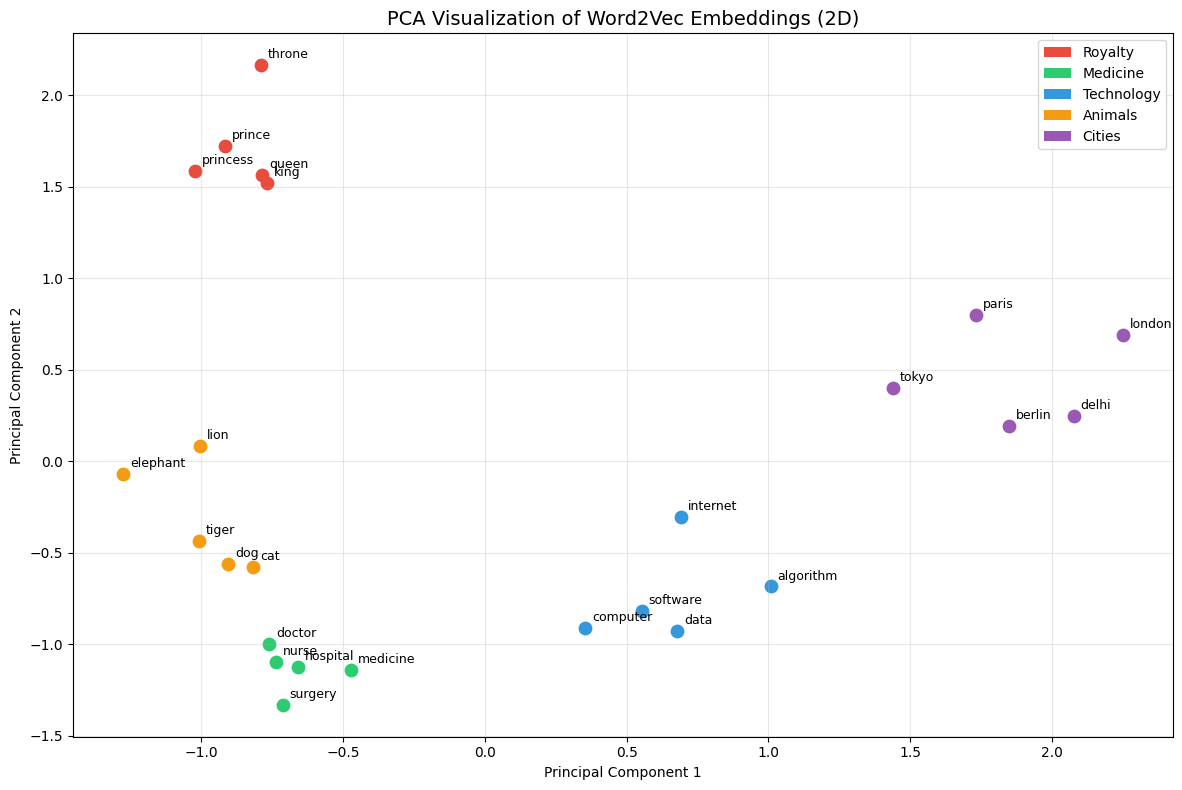

PCA plot saved as 'word_embeddings_pca.png'

Interpretation:
Words from the same semantic category cluster together in the 2D PCA projection.
Medical terms (doctor, nurse, hospital) form one cluster; cities form another.
This confirms that the 300-D embedding space has learned meaningful structure
that survives dimensionality reduction to 2D.



In [25]:
# Select ~25 semantically grouped words for visualization
vis_words = [
    # Royalty
    'king', 'queen', 'prince', 'princess', 'throne',
    # Medicine
    'doctor', 'nurse', 'hospital', 'medicine', 'surgery',
    # Technology
    'computer', 'software', 'internet', 'algorithm', 'data',
    # Animals
    'cat', 'dog', 'lion', 'tiger', 'elephant',
    # Cities
    'paris', 'london', 'tokyo', 'delhi', 'berlin'
]

# Get Word2Vec vectors
valid_words = [w for w in vis_words if w in w2v_model]
vectors = np.array([w2v_model[w] for w in valid_words])

# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(vectors)

# Define colors per category
colors = (['#e74c3c']*5 + ['#2ecc71']*5 + ['#3498db']*5 +
          ['#f39c12']*5 + ['#9b59b6']*5)[:len(valid_words)]

plt.figure(figsize=(12, 8))
for i, (word, (x, y), color) in enumerate(zip(valid_words, coords, colors)):
    plt.scatter(x, y, color=color, s=80)
    plt.annotate(word, (x, y), textcoords='offset points',
                 xytext=(5, 5), fontsize=9)

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#e74c3c', label='Royalty'),
    Patch(facecolor='#2ecc71', label='Medicine'),
    Patch(facecolor='#3498db', label='Technology'),
    Patch(facecolor='#f39c12', label='Animals'),
    Patch(facecolor='#9b59b6', label='Cities'),
]
plt.legend(handles=legend_elements, loc='upper right')
plt.title('PCA Visualization of Word2Vec Embeddings (2D)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('word_embeddings_pca.png', dpi=150)
plt.show()
print("PCA plot saved as 'word_embeddings_pca.png'")
print("""
Interpretation:
Words from the same semantic category cluster together in the 2D PCA projection.
Medical terms (doctor, nurse, hospital) form one cluster; cities form another.
This confirms that the 300-D embedding space has learned meaningful structure
that survives dimensionality reduction to 2D.
""")